In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
sns.set(style='white', palette='tab10')
idx = pd.MultiIndex

## Load data

In [16]:
df = pd.read_csv('iamc_db.csv')

In [17]:
df.head()

,Model,Scenario,Region,Variable,Unit,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,AIM/CGE,SSP1-26,World,Diagnostics|MAGICC6|Temperature|Global Mean,°C,0.913,0.989,1.251,1.517,1.667,1.738,1.770,1.787,1.789,1.786,1.774
1,AIM/CGE,SSP1-34,World,Diagnostics|MAGICC6|Temperature|Global Mean,°C,0.913,0.989,1.251,1.530,1.745,1.904,2.009,2.089,2.152,2.201,2.234
2,AIM/CGE,SSP1-45,World,Diagnostics|MAGICC6|Temperature|Global Mean,°C,0.913,0.989,1.251,1.542,1.842,2.133,2.341,2.485,2.593,2.680,2.746
3,AIM/CGE,SSP1-Baseline,World,Diagnostics|MAGICC6|Temperature|Global Mean,°C,0.913,0.989,1.252,1.569,1.900,2.224,2.506,2.768,3.012,3.232,3.422
4,AIM/CGE,SSP2-26,World,Diagnostics|MAGICC6|Temperature|Global Mean,°C,0.913,0.989,1.249,1.516,1.662,1.731,1.755,1.766,1.762,1.750,1.727


## Melt to tidy format

In [57]:
values = df.columns[5:]

df2 = df.melt(id_vars=['Scenario', 'Model'], value_vars=values,
              var_name='year', value_name='temp')

In [58]:
df2['SSP'] = df2['Scenario'].str[:4]
df2['climate'] = df2['Scenario'].str.split('-').str[-1]
df2.head()

,Scenario,Model,year,temp,SSP,climate
0,SSP1-26,AIM/CGE,2005,0.913,SSP1,26
1,SSP1-34,AIM/CGE,2005,0.913,SSP1,34
2,SSP1-45,AIM/CGE,2005,0.913,SSP1,45
3,SSP1-Baseline,AIM/CGE,2005,0.913,SSP1,Baseline
4,SSP2-26,AIM/CGE,2005,0.913,SSP2,26


## Quick view of each model/scenario

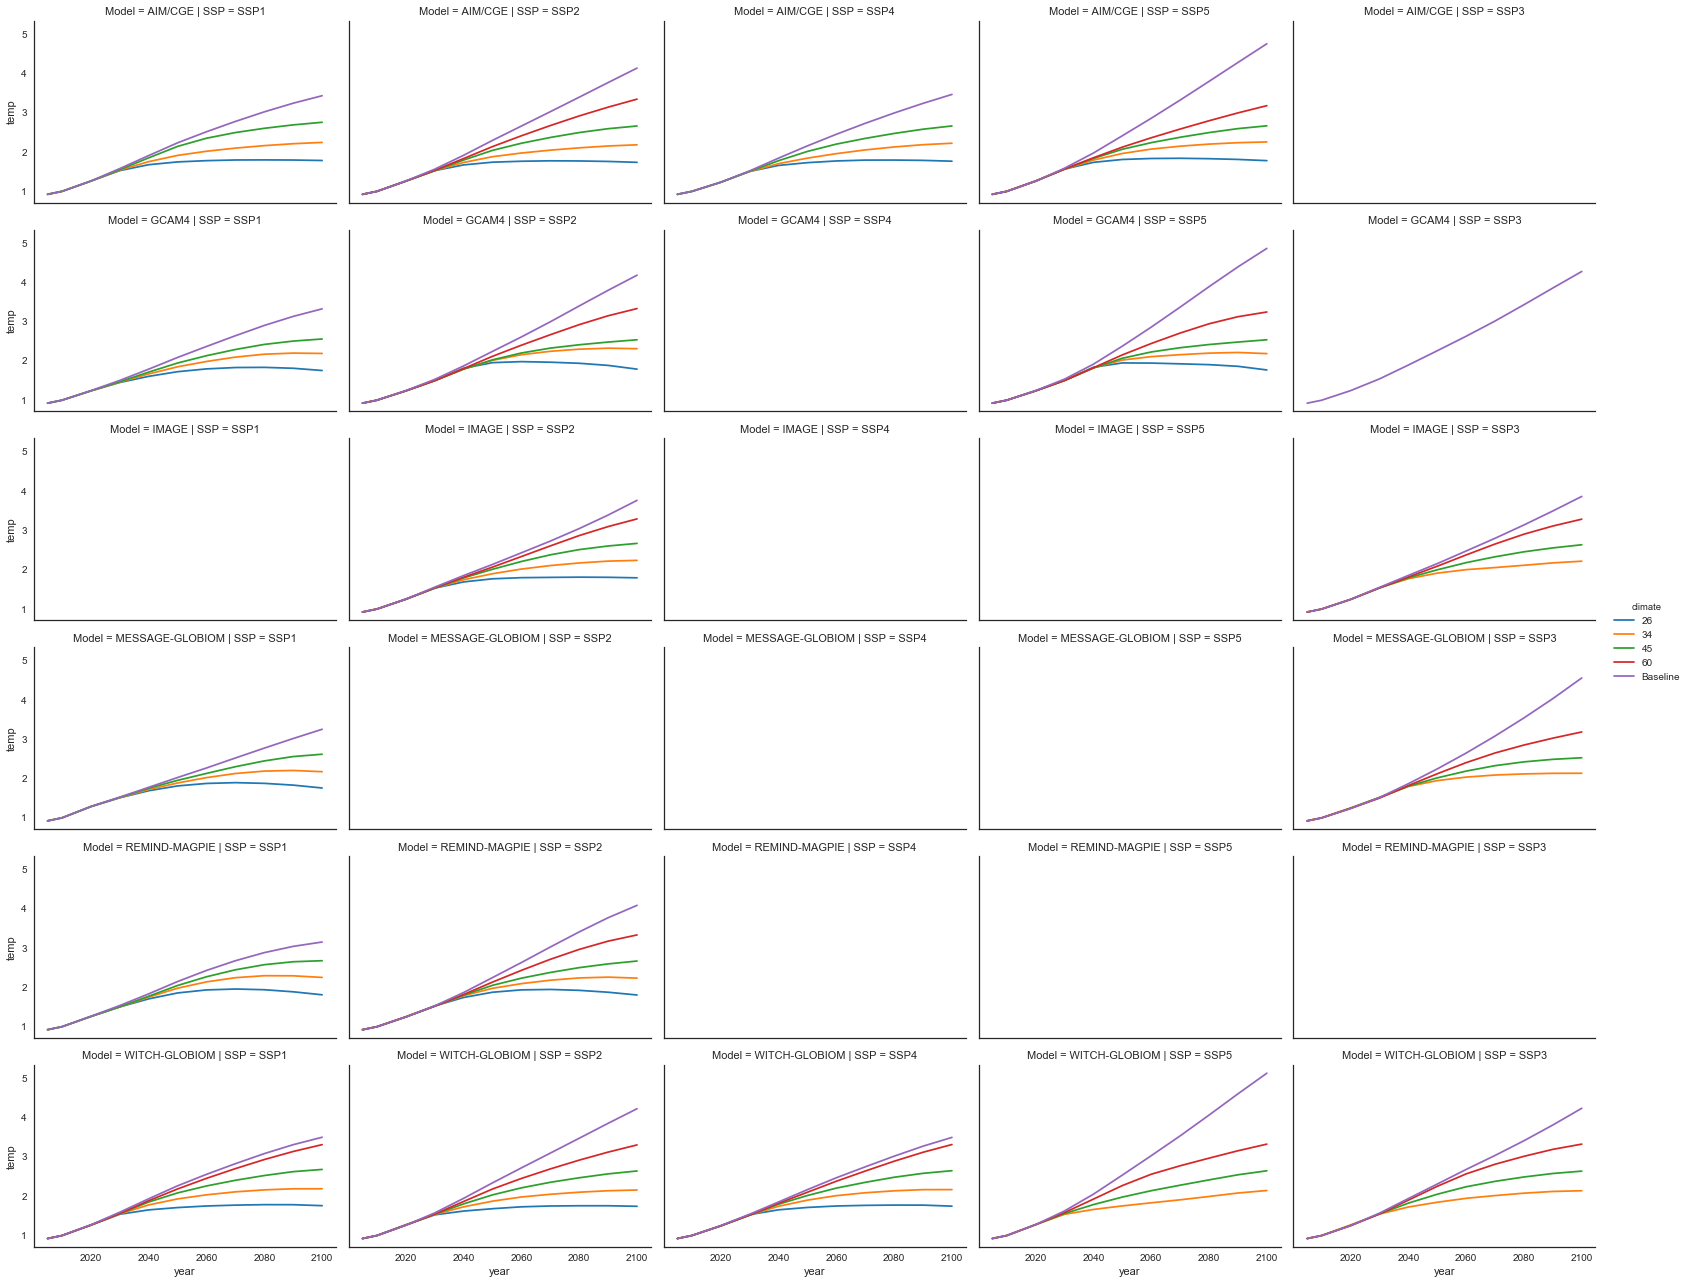

In [60]:
hue_order = ['26', '34', '45', '60', 'Baseline']

g = sns.FacetGrid(df2, col='SSP', row='Model', hue='climate', aspect=1.5,
                  hue_order=hue_order)
g.map(plt.plot, 'year', 'temp').add_legend()

In [61]:
df3 = df2.set_index(['SSP', 'Model', 'climate'])
df3.sort_index(inplace=True)
df3.head()

Scenario  year   temp
SSP  Model   climate                      
SSP1 AIM/CGE 26       SSP1-26  2005  0.913
             26       SSP1-26  2010  0.989
             26       SSP1-26  2020  1.251
             26       SSP1-26  2030  1.517
             26       SSP1-26  2040  1.667

## Example finished plot

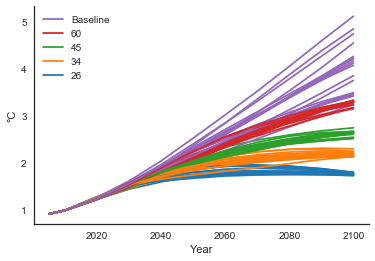

In [96]:
colors = sns.color_palette('tab10', 5)
SSPs = df2['SSP'].unique()
models = df2['Model'].unique()
climates = ['26', '34', '45', '60', 'Baseline']


fig, ax = plt.subplots()
lines = []
for ssp in SSPs:
    for model in models:
        for climate, color in zip(climates, colors):
            try:
                
                # I had trouble with the MultiIndex, so doing 
                # this the hard way
                temp = df2.loc[(df2['SSP'] == ssp) &
                               (df2['Model'] == model) &
                               (df2['climate'] == climate)]
                x = temp['year']
                y = temp['temp']

                ax.plot(x, y, c=color)
            except:
                pass
            
ax.set_xlabel('Year')
ax.set_ylabel('°C')

legend_elements = [Line2D([0], [0], color=c, label=l)
                   for (c, l) in zip(colors, climates)]

plt.legend(handles=legend_elements[::-1])
sns.despine()